# Taller (ejemplos-ejercicios) de Machine learning

En este taller se estudia la técnica de aprendizaje de máquina enfocada en problemas de regresión.


---



Por: Ángela Daniela Córdoba Álvarez


---



In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

## EJEMPLO DE REGRESIÓN LINEAL MÚLTIPLE:

- **Regresión del dataset Fish Market (mercado de peces):**

Este dataset tiene datos asociados a varias especies de peces y sus características. Cuenta con siete especies de peces. En el ejercicio de regresión intentaremos predecir el peso del pez empleando los demás atributos.
Los atributos que cada pez tiene registrados son:
peso, longitud (tres mediciones que se realizan), ancho y alto.
En este caso el modelo hará una regresión empleando varias variables de entrada

Se puede descargar de: https://www.kaggle.com/datasets/vipullrathod/fish-market

In [2]:
df = pd.read_csv("Fish.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## **TO-DO:** La tabla anterior revela que...

La tabla anterior muestra algunas características del dataset del mercado de peces. Podemos observar por columna lo siguiente:


*   En la **primera columna**, se muestra la variedad de *especies* de peces que hay. Podemos darnos cuenta que es una *variable categórica* que categoriza, valga la redundancia, a cada pez.
*   En la **segunda columna** aparece el *peso* de cada pez. Además, de que es una *variable numérica*.
* La **tercera columna** muestra una *variable numérica* que es la "*longitud 1*" que es la primera medida de la longitud de cada pez.
* La **cuarta columna** es similar a la anterior, a excepción de que muestra la *segunda medida* de la longitud del pez.
* La **quinta columna** es similar a las dos anteriores, con la diferencia de que muestra la *tercera medida de la longitud* de cada pez.
* La **sexta columna** muestra la *altura* de cada pez y también es una *variable numérica*.
* En la **séptima y última columna**, se representa el *ancho* de cada pez y también es una *variable numérica*.



In [3]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
30,Bream,920.0,35.0,38.5,44.1,18.0369,6.3063
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
60,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
97,Perch,145.0,22.0,24.0,25.5,6.3750,3.8250


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Text(0.5, 1.0, 'Correlation Matrix')

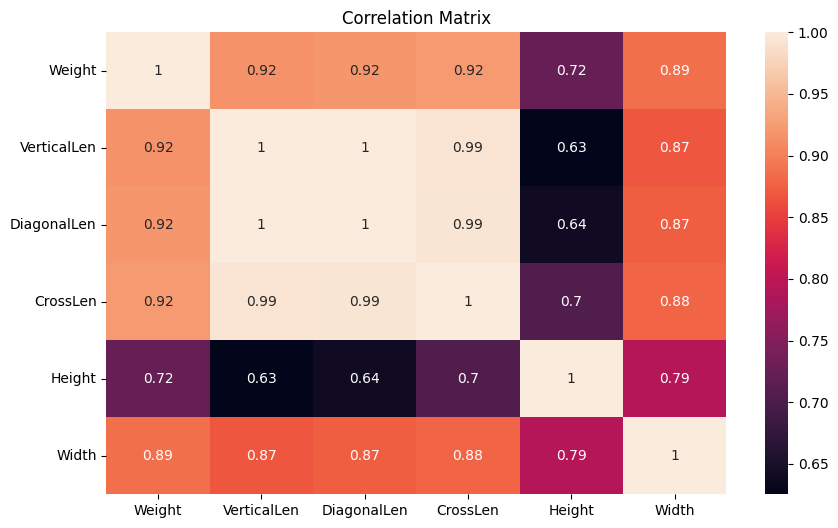

In [5]:
# y como parte de un análisis, revisaremos la correlación de las variables
df2 = df1.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

Al analizar la correlación, vemos que las variables CrossLen, VerticalLen y DiagonalLen están altamente correlacionadas (su valor de correlación es cercano al 1) por lo que, conservar estas variables puede causar problemas, es decir, el dataset no tendría variables linealmente independientes, lo que es un requisito para crear modelos de regresión.


In [6]:
# eliminando variables no independientes
df3 = df1.drop(["DiagonalLen", "CrossLen"], axis=1)
df3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


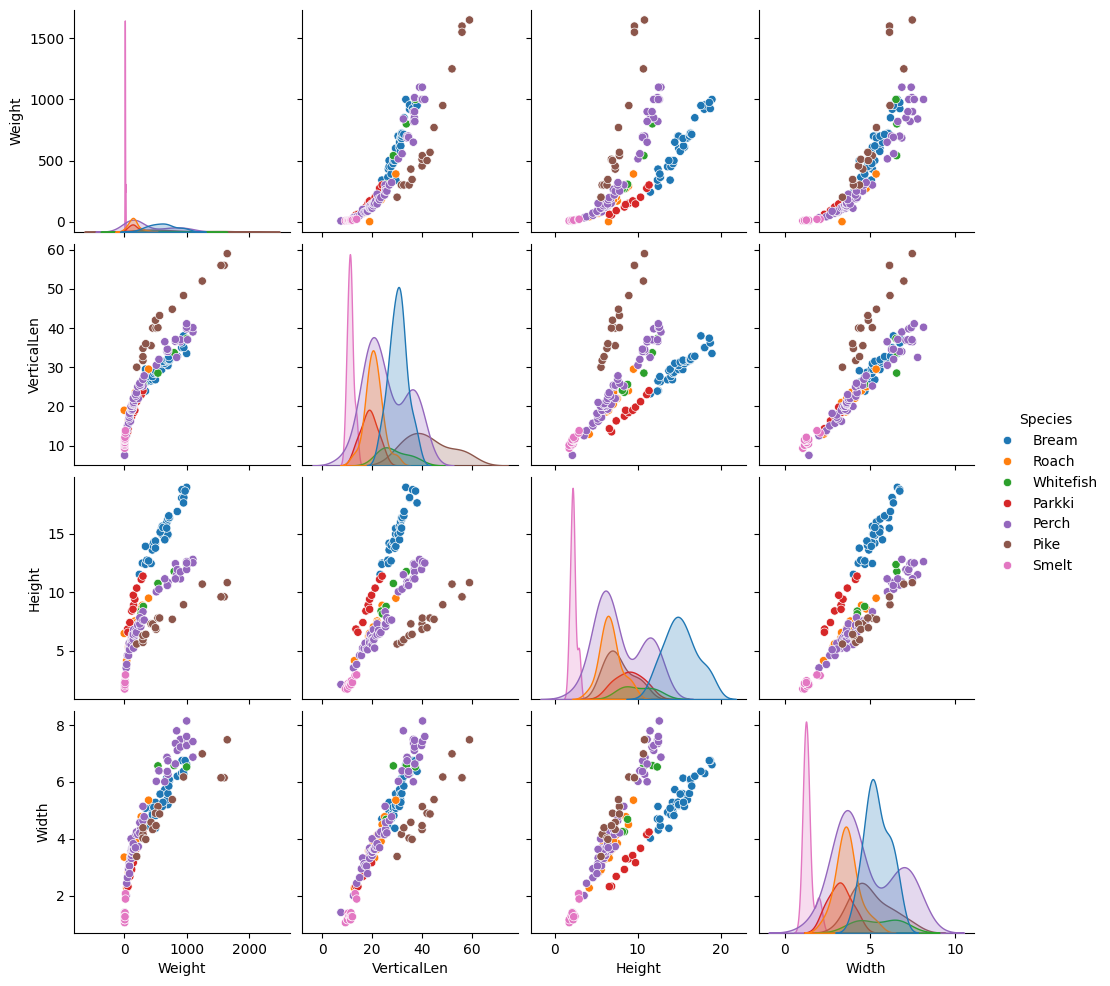

In [7]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

In [8]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

Species        0
Weight         0
VerticalLen    0
Height         0
Width          0
dtype: int64

In [9]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df3[df3["Weight"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Species,Weight,VerticalLen,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [10]:
df3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


In [11]:
# ya que las especies son un valor categórico, y necesitamos números para entrenar modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los nombres de especies (7 especies) en un arreglo de 1x7 donde solo se verá un uno (True) en la columna que corresponda al nombre, en el otro caso se tendrán ceros (False).
especies_codificadas = pd.get_dummies(df3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [12]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df3, especies_codificadas], axis="columns")
df4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
df5 = df4.drop(["Species", "Whitefish"], axis="columns")
df5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,11.5200,4.0200,True,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,True,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,True,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,True,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,True,False,False,False,False,False


### Creando un modelo de regresión
Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación. También es necesario separar el dataframe en dos variables que sirvan como datos ($X$) y etiquetas ($y$)

In [13]:
# X tendrá los datos de entrenamiento
X = df5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = df5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (127, 8)
Tamaño de X_test= (32, 8)
Tamaño de y_train= (127, 1)
Tamaño de y_test= (32, 1)


## EJEMPLOS DE REGRESIÓN POLINÓMICA:

- **Regresión polinómica (no lineal):**

Como se tienen diferentes especies de peces, la relacion entre características como peso, ancho y alto no es lineal. Por lo tanto, una recta no va a modelar apropiadamente el comportamiento del peso de los peces en función de sus características.
 Crearemos una función para visualizar datos usando un polinomio con varios grados.

Las funciones que permiten trazar varios grados de un polinomio en función de los datos son `np.polyfit()` que funciona mediante mínimos cuadrados para resovler una ecuación polinómica. Esta función requiere suministrar datos (x,y) y el grado del polinomio a ajustar. Polyfit retornará los coeficientes que mejor se ajusten a los datos.

In [14]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    #quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    #plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Función lineal para la característica %s" % (feature.name))
    #plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

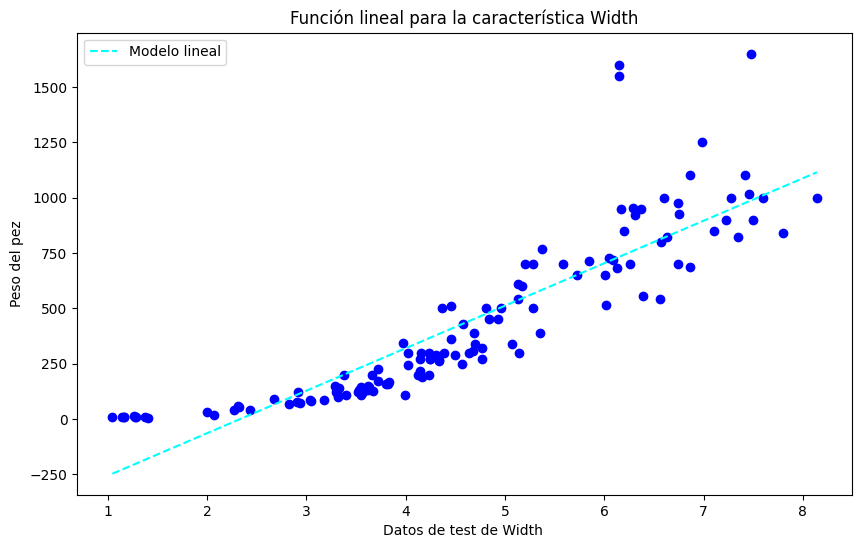

In [15]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

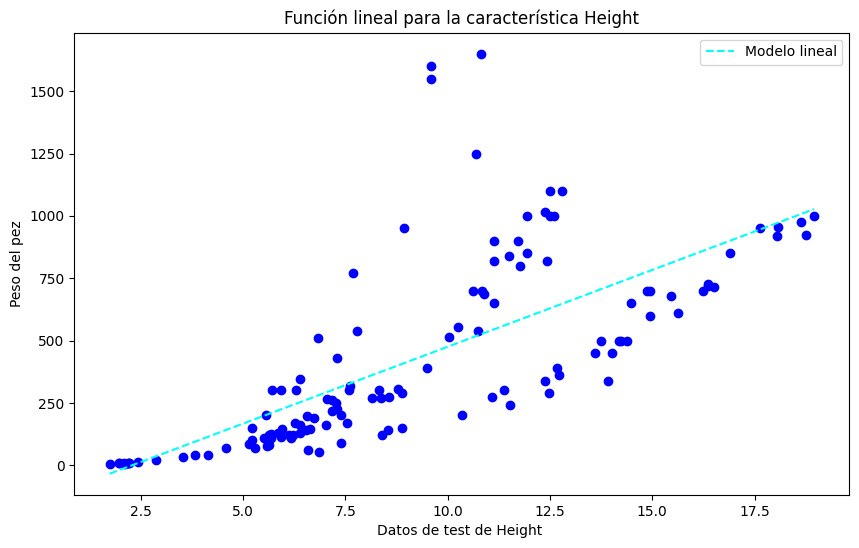

In [16]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

## **TO-DO:** La gráfica anterior revela que...

La gráfica anterior revela que los datos parecen alinearse a lo largo de la línea recta, lo que como dice el gráfico, indica una relación de la función lineal entre la altura y el peso del pez.

Además, observamos que la línea tiene una pendiente positiva, lo que nos dice que hay una correlación positiva entre la altura y el peso. Esto es, a medida que aumenta la altura del pez, su peso también lo hace.

# **TAREA en clase/casa:**

1. Interpretar los resultados anteriores
2. De acuerdo a lo anterior, aplicar al mismo dataset (escogido por usted) los 2 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple).

**DESARROLLO:**


> 1. Los resultados presentados al ejecutar todas las celdas sobre el dataset del mercado de peces, muestran una relación lineal entre el peso y la altura de cada pez, como también una relación entre el peso y el ancho. En el caso de las últimas gráficas, vemos que la gráfica del peso vs. el ancho posee mayor "afinidad" en el sentido de que los datos son cada vez más cercano a la línea de regresión; mientras que la segunda gráfica del peso vs. la altura, aunque varios de sus datos tienden a la línea, estos son un poco más alejados, mostrando una regresión un poco más polinómica.

> La regresión polinómica permite modelar relaciones más complejas entre las variables independientes de este conjunto que son: largo, alto y ancho; y la variable dependiente: que es el peso. Lo cual nos muestra una posible existencia de patrones no lineales en el conjunto de datos.








---
## Dataset nuevo con los 2 métodos de regresión:
> 2. Para realizar esta tarea, haré uso de un dataset proporcionado por la página *kaggle*: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025/data

In [17]:
# Importamos las librerías posibles a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
# Cargamos el conjunto de datos y los convertimos a DataFrame

df_ranking = pd.read_csv("qs-world-rankings-2025.csv")
df_ranking.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [19]:
df_ranking.shape

(1503, 16)

In [20]:
df_ranking.describe()

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
count,1503.00000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.28656,19.786693,28.128676,23.503460,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.30000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.50000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [21]:
# Miramos en qué columnas hay valores faltantes
df_ranking.isnull().sum()

2025 Rank                           0
2024 Rank                          21
Institution Name                    0
Location                            0
Location Full                       0
Size                                0
Academic Reputation                 0
Employer Reputation                 0
Faculty Student                     0
Citations per Faculty               0
International Faculty             100
International Students             58
International Research Network      1
Employment Outcomes                 0
Sustainability                     19
QS Overall Score                    0
dtype: int64

In [22]:
# Columnas con missing values
columnas = ['2025 Rank', '2024 Rank', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']

# Convertimos esas columnas a valores numéricos
for columna in columnas:
  df_ranking[columna] = pd.to_numeric(df_ranking[columna], errors='coerce')
  df_ranking[columna] = df_ranking[columna].fillna(df_ranking[columna].mean(), inplace=True)

df_ranking.isnull().sum()

2025 Rank                         1503
2024 Rank                         1503
Institution Name                     0
Location                             0
Location Full                        0
Size                                 0
Academic Reputation                  0
Employer Reputation                  0
Faculty Student                      0
Citations per Faculty                0
International Faculty             1503
International Students            1503
International Research Network    1503
Employment Outcomes                  0
Sustainability                    1503
QS Overall Score                     0
dtype: int64

Podemos hacerle algunas visualizaciones usando la librería de Seaborn, lo que nos permite observar mejor el comportamiento del conjunto de datos.

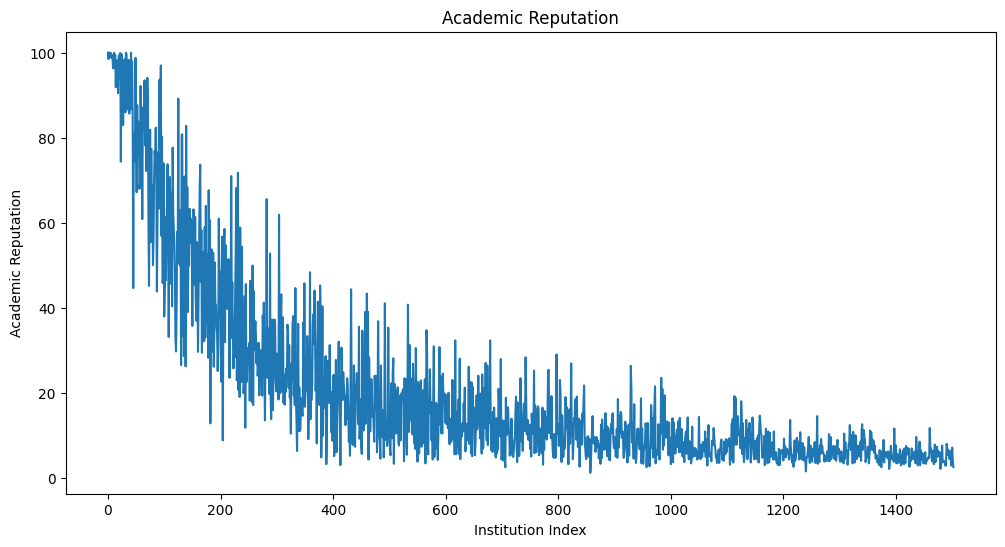

In [23]:
# En este caso visualizaremos la columna de "Academic Reputation"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_ranking, x='2025 Rank', y='Academic Reputation')
sns.lineplot(data=df_ranking, x=df_ranking.index, y="Academic Reputation")
plt.title("Academic Reputation")
plt.xlabel("Institution Index")
plt.ylabel("Academic Reputation")
plt.show()

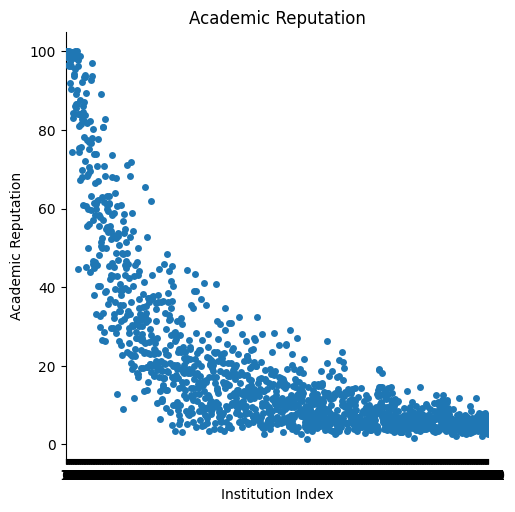

In [24]:
# Hacemos lo mismo pero con la columna de 'International Students'
sns.catplot(data=df_ranking, x=df_ranking.index, y="Academic Reputation")
plt.title("Academic Reputation")
plt.xlabel("Institution Index")
plt.ylabel("Academic Reputation")
plt.show()

Para hacer los datos más manejables, podemos hacer algo parecido pero solo con el top 5 de universidades.

In [25]:
top = df_ranking.sort_values(by='QS Overall Score', ascending=False).head(5)
top[['Institution Name', 'QS Overall Score', 'Location']]

,Institution Name,QS Overall Score,Location
1,Imperial College London,98.5,UK
2,University of Oxford,96.9,UK
3,Harvard University,96.8,US
4,University of Cambridge,96.7,UK
5,Stanford University,96.1,US


In [26]:
# Eliminamos las columnas de variables catgóricas para poder hacer la matriz de correlación
no_numericas = df_ranking.select_dtypes(include=['float64'])
matriz = no_numericas.corr()
no_numericas

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,Employment Outcomes
0,100.0,100.0,100.0,100.0,100.0
1,98.5,99.5,98.2,93.9,93.4
2,100.0,100.0,100.0,84.8,100.0
3,100.0,100.0,96.3,100.0,100.0
4,100.0,100.0,100.0,84.6,100.0
...,...,...,...,...,...
1498,3.0,2.2,10.6,6.1,3.1
1499,5.6,2.2,4.0,1.9,6.2
1500,7.2,9.4,3.3,1.8,9.6
1501,4.1,4.2,7.2,3.9,3.9


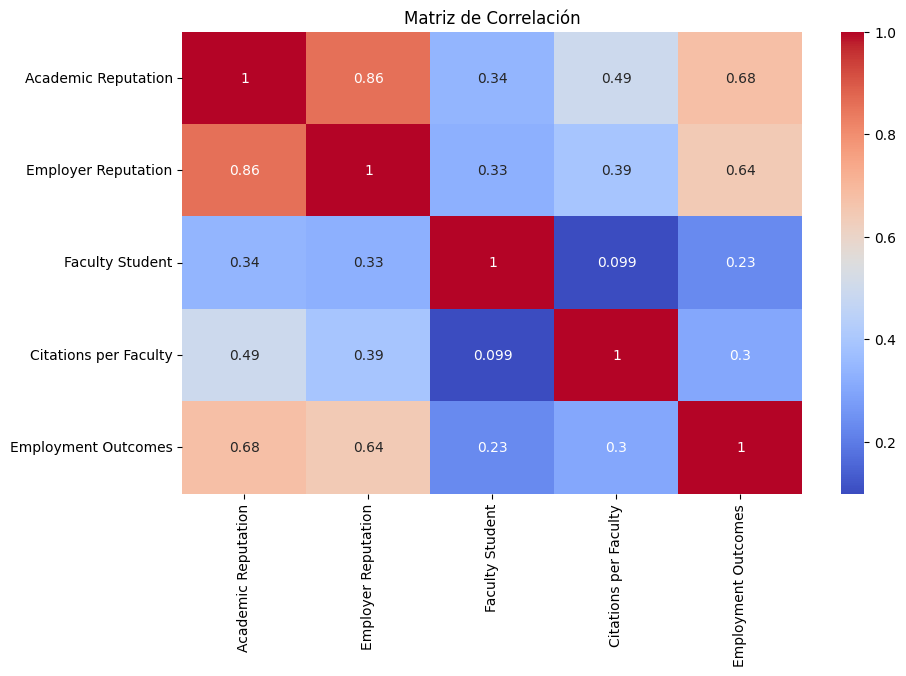

In [27]:
# Código para regresión lineal
# Importamos la librería necesaria
import pandas as pd

# Cargamos el conjunto de datos
df_ranking = pd.read_csv('qs-world-rankings-2025.csv')

# Reemplazamos los '-' por NaN
df_ranking = df_ranking.replace('-', pd.NA)

# Convertimos las columnas a numéricas
for col in ['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability', 'QS Overall Score']:
    df_ranking[col] = pd.to_numeric(df_ranking[col], errors='coerce')

X = df_ranking[['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']]
y = df_ranking['QS Overall Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimimos la gráfica
plt.figure(figsize=(10, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Finalizamos haciendo la gráfica de regresión

Regresión Lineal Simple - MSE: 67.84034642617974, R²: 0.8139433999183564
Regresión Lineal Múltiple - MSE: 41.211969528512014, R²: 0.8869734702565694


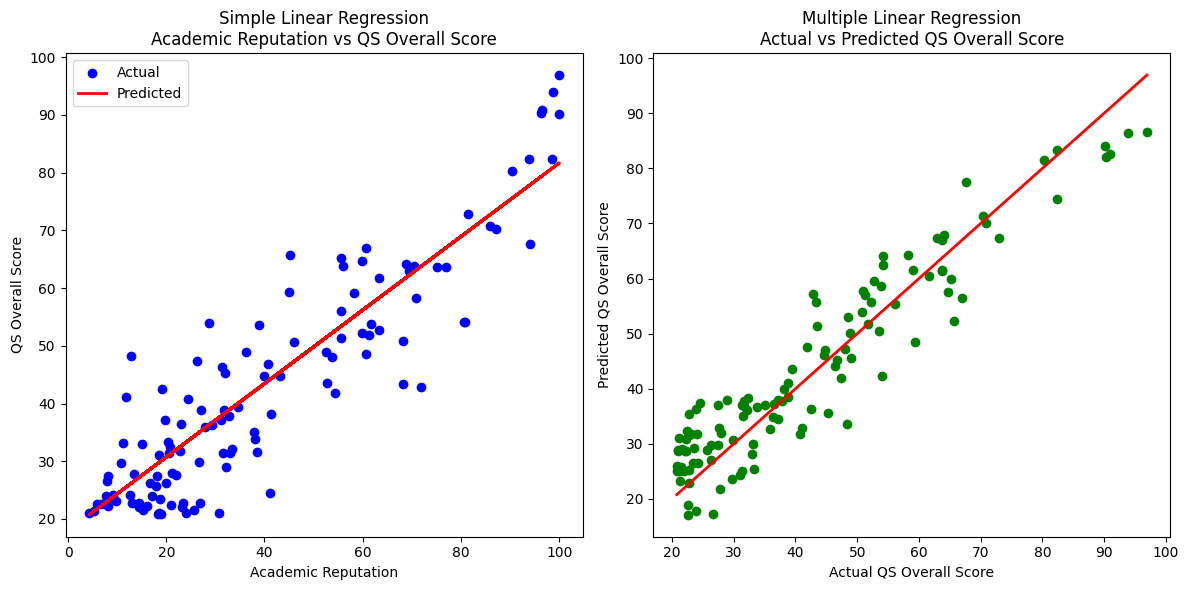

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Proporcionado por CHATGPT

# Cargamos el conjunto de datos
df_ranking = pd.read_csv('qs-world-rankings-2025.csv')

# Reemplazamos los '-' por NaN
df_ranking = df_ranking.replace('-', pd.NA)

# Convertimos las columnas a numéricas
for col in ['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability', 'QS Overall Score']:
    df_ranking[col] = pd.to_numeric(df_ranking[col], errors='coerce')

# Eliminamos filas con valores faltantes en las columnas utilizadas
df_ranking = df_ranking.dropna(subset=['QS Overall Score', 'Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability'])

# Separamos el DataFrame
X = df_ranking[['Academic Reputation', 'International Faculty', 'International Students', 'International Research Network', 'Sustainability']]
y = df_ranking['QS Overall Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regresión Lineal Simple
# Usando "Academic Reputation" para predecir "QS Overall Score"
X_simple = X_train[['Academic Reputation']]
X_simple_test = X_test[['Academic Reputation']]
y_simple_train = y_train
y_simple_test = y_test

# Crear y entrenar el modelo
simple_lr = LinearRegression()
simple_lr.fit(X_simple, y_simple_train)

# Predecir y evaluar
y_pred_simple = simple_lr.predict(X_simple_test)
mse_simple = mean_squared_error(y_simple_test, y_pred_simple)
r2_simple = r2_score(y_simple_test, y_pred_simple)


# Regresión Lineal Múltiple
# Usando todas las características numéricas para predecir "QS Overall Score"
# Crear y entrenar el modelo
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_multiple = multiple_lr.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)


# Resultados
print(f'Regresión Lineal Simple - MSE: {mse_simple}, R²: {r2_simple}')
print(f'Regresión Lineal Múltiple - MSE: {mse_multiple}, R²: {r2_multiple}')

# Graficar resultados de la regresión lineal simple
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_simple_test, y_simple_test, color='blue', label='Actual')
plt.plot(X_simple_test, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression\nAcademic Reputation vs QS Overall Score')
plt.xlabel('Academic Reputation')
plt.ylabel('QS Overall Score')
plt.legend()

# Graficar resultados de la regresión lineal múltiple
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Multiple Linear Regression\nActual vs Predicted QS Overall Score')
plt.xlabel('Actual QS Overall Score')
plt.ylabel('Predicted QS Overall Score')

plt.tight_layout()
plt.show()


